In [1]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import re
from datetime import datetime
from konlpy.tag import Okt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
# CSV 파일 읽기
df = pd.read_csv("./레이블부여된공지사항(수정본).csv") 
df.head()

,Cid,title,hits,time,cluster
0,1,(예비군연대) 2023년 6월 각 군 현역병 모집계획 안내,116,2023-05-26,43
1,1,2023 세계스카우트잼버리 영외과정활동 「사찰문화체험」 통역 자원봉사자 모집,99,2023-05-26,25
2,1,「대학생 테마별 톡톡 멘토링」 참여 동아리 추가모집,180,2023-05-25,285
3,1,「2023년 국가간 청소년교류」 및 「글로벌 청소년 서밋」청소년 참가자 모집,174,2023-05-25,354
4,1,2023-1 실험실습 교과목 만족도 조사 안내 (드림패스 마일리지 지급),125,2023-05-25,140


In [8]:
lf = df.reindex(columns=["title","cluster"]) 
lf

,title,cluster
0,(예비군연대) 2023년 6월 각 군 현역병 모집계획 안내,43
1,2023 세계스카우트잼버리 영외과정활동 「사찰문화체험」 통역 자원봉사자 모집,25
2,「대학생 테마별 톡톡 멘토링」 참여 동아리 추가모집,285
3,「2023년 국가간 청소년교류」 및 「글로벌 청소년 서밋」청소년 참가자 모집,354
4,2023-1 실험실습 교과목 만족도 조사 안내 (드림패스 마일리지 지급),140
...,...,...
9902,2019년 1학기 학석 공통 과목 개설목록 안내,25
9903,대학원 강좌 수강신청 안내,307
9904,2019학년도 봄 학위수여식 일정 공지,214
9905,2019학년도 1학기 희망강의 신청 안내,169


In [9]:
lf.to_csv(r'.\title cluster dataset.csv', index = False)

# Naive Bayes모델

In [37]:
# CSV 파일 읽기
data = pd.read_csv('title cluster dataset.csv')

In [38]:
#데이터 전처리 테스트가 벡터로 변환
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['title'])
y = data['cluster']

In [39]:
#훈련 데이터 분리 train 데이터 80%, test 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#print(X_train)

In [41]:
#모델 훈련
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [42]:
#정확도 구하기
y_pred = model.predict(X_test)
NaiveBayes_accuracy = accuracy_score(y_test, y_pred)
print("정확도:", NaiveBayes_accuracy)

정확도: 0.1367305751765893


# SVM모델

In [30]:
from sklearn.svm import SVC

In [31]:
data = pd.read_csv('title cluster dataset.csv')

In [85]:
#데이터 전처리 테스트가 벡터로 변환
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])
y = data['cluster']

In [86]:
#훈련 데이터 분리 train 데이터 80%, test 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [36]:
y_pred = model.predict(X_test)
SVM_accuracy = accuracy_score(y_test, y_pred)
print("정확도:", SVM_accuracy)

정확도: 0.6316851664984864


# CNN모델

In [97]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from konlpy.tag import Okt
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
# CSV 파일 읽기
df = pd.read_csv("./레이블부여된공지사항(수정본).csv") 

notice_names = df['title'].tolist()

# 전처리 함수 정의
def preprocess_text(text):
    # 특수문자 제거
    text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", text)

    # 숫자 정보 제거
    text = re.sub(r'\d+', '', text)

    # 형태소 분석
    tagger = Okt()
    words = tagger.morphs(text)

    # 불용어 제거
    stop_words = ['필독', '학기', '학년', '도', '년', '제', '회', '월', '학부', '일', '차', '년도', '안내']  # 불용어 리스트
    words = [word for word in words if word not in stop_words]

    # 분석된 형태소들을 공백으로 결합하여 문장으로 반환
    text = ' '.join(words)

    return text


preprocessed_notice_names = [preprocess_text(notice_name) for notice_name in notice_names]

In [99]:
# 토크나이저 생성
tokenizer = Tokenizer()

# 토크나이저가 데이터를 학습
tokenizer.fit_on_texts(preprocessed_notice_names)

# 데이터를 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(preprocessed_notice_names)

# 가장 긴 문장의 길이를 확인
max_sequence_length = max(len(s) for s in sequences)
print('가장 긴 문장의 길이:', max_sequence_length)

# 어휘 사전의 크기를 확인 (+1을 하는 이유는 0인덱스를 고려하기 때문입니다.)
vocab_size = len(tokenizer.word_index) + 1
print('어휘 사전의 크기:', vocab_size)

# 모든 문장을 가장 긴 문장의 길이로 패딩 처리
padded_X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

가장 긴 문장의 길이: 29
어휘 사전의 크기: 6093


In [100]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_notice_names)

tfidf_model = TfidfVectorizer().fit(preprocessed_notice_names)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cluster'])

In [101]:
# 훈련 데이터 분리: train 데이터 80%, test 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(padded_X, y, test_size=0.2, random_state=42)

In [102]:
# 타겟 변수 다중 클래스 원-핫 인코딩
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [103]:
# CNN 모델 생성
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_sequence_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))

# 출력 뉴런의 개수와 활성화 함수를 클래스 개수에 따라 조정
num_classes = len(set(y))  # 클래스 개수 계산
if num_classes == 2:
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
else:
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
#모델 훈현
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
248/248 [==============================] - 5s 15ms/step - loss: 5.7416 - accuracy: 0.0776 - val_loss: 4.9572 - val_accuracy: 0.1529
Epoch 2/10
248/248 [==============================] - 3s 13ms/step - loss: 3.5895 - accuracy: 0.3233 - val_loss: 2.5819 - val_accuracy: 0.5202
Epoch 3/10
248/248 [==============================] - 3s 13ms/step - loss: 1.4906 - accuracy: 0.7027 - val_loss: 1.4912 - val_accuracy: 0.7023
Epoch 4/10
248/248 [==============================] - 3s 13ms/step - loss: 0.6054 - accuracy: 0.8787 - val_loss: 1.1156 - val_accuracy: 0.7805
Epoch 5/10
248/248 [==============================] - 3s 13ms/step - loss: 0.2571 - accuracy: 0.9518 - val_loss: 1.0001 - val_accuracy: 0.7916
Epoch 6/10
248/248 [==============================] - 3s 13ms/step - loss: 0.1164 - accuracy: 0.9821 - val_loss: 0.9937 - val_accuracy: 0.8068
Epoch 7/10
248/248 [==============================] - 3s 13ms/step - loss: 0.0523 - accuracy: 0.9943 - val_loss: 0.9725 - val_accuracy: 0.8209

In [105]:
y_prob = model.predict(X_test, verbose=0) 
y_pred = y_prob.argmax(axis=-1)
CNN_accuracy = np.sum(y_pred.flatten() == y_test) / len(y_test)
print("Accuracy:", CNN_accuracy)

Accuracy: 0.8213925327951564


# LSTM모델

In [125]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from konlpy.tag import Okt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM

In [126]:
# CSV 파일 읽기
df = pd.read_csv("./레이블부여된공지사항(수정본).csv") 

notice_names = df['title'].tolist()

# 전처리 함수 정의
def preprocess_text(text):
    # 특수문자 제거
    text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", text)

    # 숫자 정보 제거
    text = re.sub(r'\d+', '', text)

    # 형태소 분석
    tagger = Okt()
    words = tagger.morphs(text)

    # 불용어 제거
    stop_words = ['필독', '학기', '학년', '도', '년', '제', '회', '월', '학부', '일', '차', '년도', '안내']  # 불용어 리스트
    words = [word for word in words if word not in stop_words]

    # 분석된 형태소들을 공백으로 결합하여 문장으로 반환
    text = ' '.join(words)

    return text


preprocessed_notice_names = [preprocess_text(notice_name) for notice_name in notice_names]

In [141]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_notice_names)

tfidf_model = TfidfVectorizer().fit(preprocessed_notice_names)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cluster'])

In [142]:
# 토크나이저 생성
tokenizer = Tokenizer()

# 토크나이저가 데이터를 학습
tokenizer.fit_on_texts(preprocessed_notice_names)

# 데이터를 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(preprocessed_notice_names)

# 가장 긴 문장의 길이를 확인
max_sequence_length = max(len(s) for s in sequences)
print('가장 긴 문장의 길이:', max_sequence_length)

# 어휘 사전의 크기를 확인 (+1을 하는 이유는 0인덱스를 고려하기 때문입니다.)
vocab_size = len(tokenizer.word_index) + 1
print('어휘 사전의 크기:', vocab_size)

# 모든 문장을 가장 긴 문장의 길이로 패딩 처리
padded_X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

가장 긴 문장의 길이: 29
어휘 사전의 크기: 6093


In [143]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_notice_names)

tfidf_model = TfidfVectorizer().fit(preprocessed_notice_names)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cluster'])

In [144]:
# 훈련 데이터 분리: train 데이터 80%, test 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(padded_X, y, test_size=0.2, random_state=42)

In [145]:
# 타겟 변수 다중 클래스 원-핫 인코딩
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [146]:
# LSTM 모델 생성
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))

# 출력 뉴런의 개수와 활성화 함수를 클래스 개수에 따라 조정
num_classes = len(set(y))  # 클래스 개수 계산
if num_classes == 2:
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
else:
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [147]:
# 모델 훈련
model.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/30
248/248 [==============================] - 8s 26ms/step - loss: 5.9465 - accuracy: 0.0631 - val_loss: 5.8432 - val_accuracy: 0.0626
Epoch 2/30
248/248 [==============================] - 6s 25ms/step - loss: 5.6676 - accuracy: 0.0664 - val_loss: 5.6805 - val_accuracy: 0.0621
Epoch 3/30
248/248 [==============================] - 6s 23ms/step - loss: 5.4432 - accuracy: 0.0662 - val_loss: 5.4365 - val_accuracy: 0.0631
Epoch 4/30
248/248 [==============================] - 6s 25ms/step - loss: 5.1132 - accuracy: 0.0685 - val_loss: 5.1560 - val_accuracy: 0.0636
Epoch 5/30
248/248 [==============================] - 6s 23ms/step - loss: 4.7836 - accuracy: 0.0741 - val_loss: 5.0282 - val_accuracy: 0.0535
Epoch 6/30
248/248 [==============================] - 6s 23ms/step - loss: 4.5109 - accuracy: 0.0813 - val_loss: 4.8269 - val_accuracy: 0.0525
Epoch 7/30
248/248 [==============================] - 7s 29ms/step - loss: 4.2631 - accuracy: 0.0972 - val_loss: 4.7086 - val_accuracy: 0.0772

In [148]:
y_prob = model.predict(X_test, verbose=0) 
y_pred = y_prob.argmax(axis=-1)
LSTM_accuracy = np.sum(y_pred.flatten() == y_test) / len(y_test)
print("Accuracy:", LSTM_accuracy)

Accuracy: 0.6382441977800202


# 성능 비교 시각화

In [174]:
import matplotlib.pyplot as plt

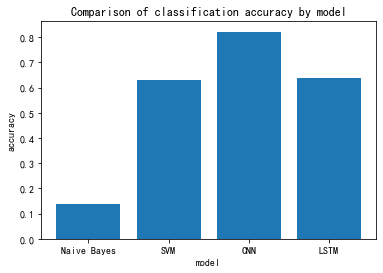

In [175]:
#그래프로 성능 비교 

x = ('Naive Bayes', 'SVM', 'CNN', 'LSTM')
y = [NaiveBayes_accuracy,SVM_accuracy,CNN_accuracy, LSTM_accuracy]
plt.xlabel("model")
plt.ylabel("accuracy")
plt.bar(x, y)  # 데이터 가로 나온 함수 barh
plt.title('Comparison of classification accuracy by model')

plt.show()
